In [5]:
## загрузка и изучение данных
import pandas as pd
df = pd.read_csv('onlinefoods[1].csv') ##загружаю данные из файла
df


,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


In [6]:
import matplotlib.pyplot as plt ##Импортирую библиотека для работы
import numpy as pd
import seaborn as sns

In [7]:
print("Инфо о датасете:")
df.info() ##вывожу общюю инфу о датасета
print()
print("Кол-во пропусков в каждой колонке:")
print(df.isnull().sum()) ##проверяю каждый элемен на пропуски и сумирую кол-во пропусков по каждому столбцу


Инфо о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int

In [9]:
##Очистка данных
print(f"Количество дубликатов до: {df.duplicated().sum()}") ##проверяем все строки на дубликаты

df = df.drop_duplicates() ## удаляю ненужные строки
print(f"Размер датасета после удаления дубликатов: {df.shape}") ## вывожу новый размер датасета





Количество дубликатов до: 0
Размер датасета после удаления дубликатов: (285, 13)


In [19]:
##удаление столбца Unnamed:12, так как он не нужен
df = df.drop('Unnamed:12' , axis=1 , errors='ignore')

##прверяем изменения
print("Изменение датасета:")
df.info()

## Создание новых признаков
df['Output_encoded'] = df['Output'].apply(lambda x: 1 if x == 'Yes' else 0) ##Кодирую столбец Output .Если значение Да, присваевается-1, иначе в других случаях -0

df['Feedback_encoded'] = df['Feedback'].apply(lambda x: 1 if x == 'Positive' else 0)  ##делаю тоже самое только для позитивных

print(" Новые закодированные столбцы:")
print(df[['Output', 'Output_encoded', 'Feedback', 'Feedback_encoded']].head())  ##выводит новые закодированныые столбцы

Изменение датасета:
<class 'pandas.core.frame.DataFrame'>
Index: 285 entries, 0 to 386
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         285 non-null    int64  
 1   Gender                      285 non-null    object 
 2   Marital Status              285 non-null    object 
 3   Occupation                  285 non-null    object 
 4   Monthly Income              285 non-null    object 
 5   Educational Qualifications  285 non-null    object 
 6   Family size                 285 non-null    int64  
 7   latitude                    285 non-null    float64
 8   longitude                   285 non-null    float64
 9   Pin code                    285 non-null    int64  
 10  Output                      285 non-null    object 
 11  Feedback                    285 non-null    object 
 12  Unnamed: 12                 285 non-null    object 
 13  Output_encoded      

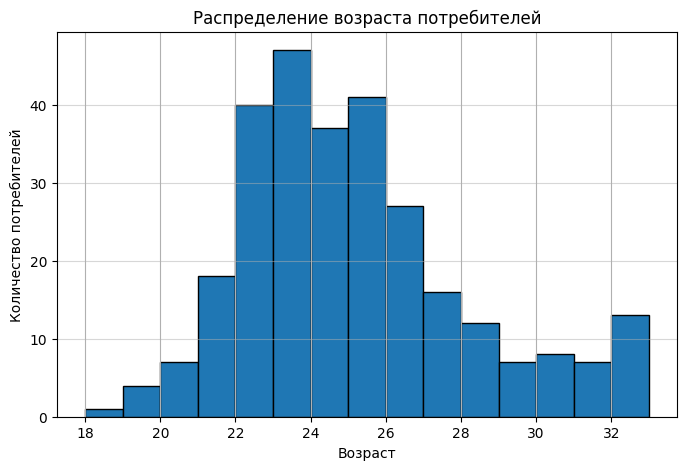

In [21]:
##Визуализация
##Диаграмма 1 Распределение возраста потребителей
## Диограмма показывает , что большинство потребителей находятся в возрастном диапозоне от 25 до 35 лет.


plt.figure(figsize=(8, 5))  ##создаю область для грфика 8 на5
df['Age'].hist(bins=15, edgecolor='black')  ##строи гистограмму для столбца Age c 15 ,интервалами и черными границами и прозрачностью 0.7
plt.title('Распределение возраста потребителей') ##делаю заголовок
plt.xlabel('Возраст') ##подписываю ось х
plt.ylabel('Количество потребителей') ##подписываю ось у
plt.grid(axis='y', alpha=0.5) 
plt.show()

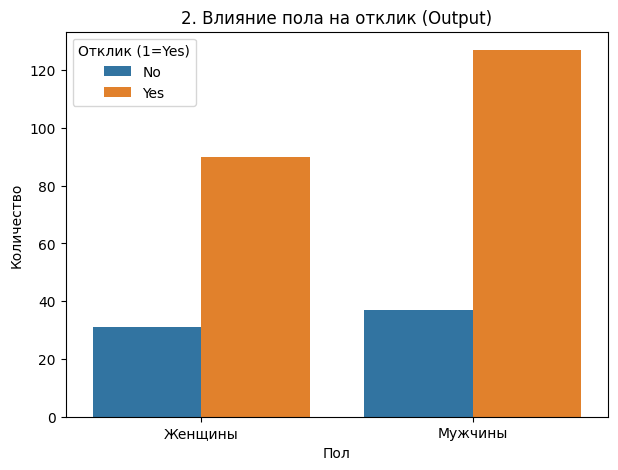

In [24]:
##Диаграмма 2 Влияние пола на отклик
## Анализ показывает что, мужчины больше ставят положительные отклики по сравнению с женщинами.
gender_mapping = {
    'Male': 'Мужчины',
    'Female': 'Женщины'}  ##Делаю словарь 
df['Gender'] = df['Gender'].replace(gender_mapping) 
plt.figure(figsize=(7, 5))
sns.countplot(x='Gender', hue='Output_encoded', data=df) ##строю диаграмму из библиотеки Seaborn ,где Output_encoded делит столбцы по коду
plt.title(' Влияние пола на отклик (Output)')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.legend(title='Отклик (1=Yes)', labels=['No', 'Yes']) ##обозначаю цвета
plt.show()

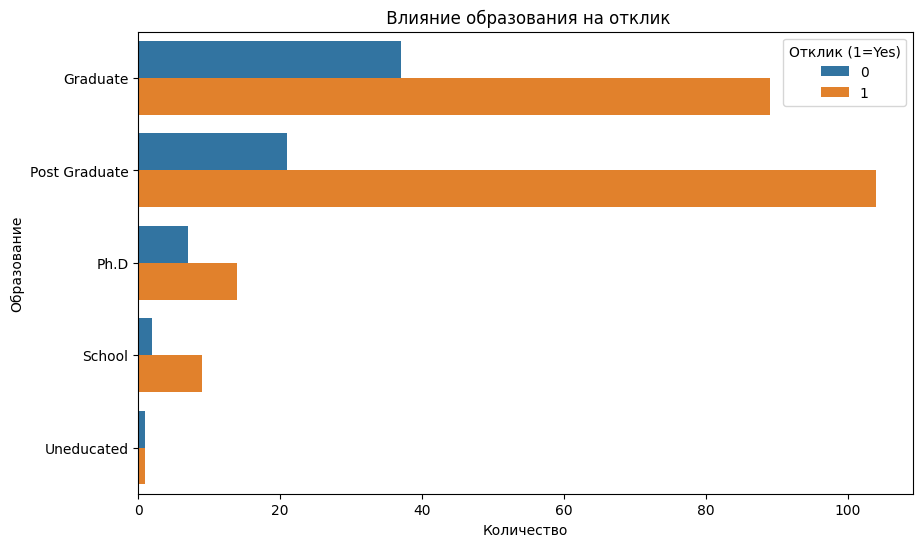

In [26]:
##Диаграмма3 Влияние образования на отклик
##группа graduate является самой многочисленной группой
plt.figure(figsize=(10, 6)) 
sns.countplot(y='Educational Qualifications', hue='Output_encoded', data=df, order=df['Educational Qualifications'].value_counts().index) ## строю столбчатую диаграмму , доп аргумент сортирую столбцы по убыванию их общего кол-ва
plt.title(' Влияние образования на отклик')
plt.xlabel('Количество')
plt.ylabel('Образование')
plt.legend(title='Отклик (1=Yes)')
plt.show()

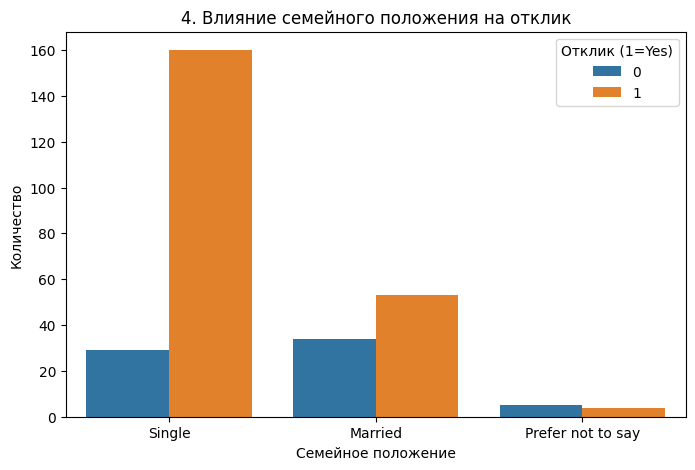

In [27]:
## Диаграмма 4 Влияние семейного положения на отклик
##Потребители Single демострируют самое большое кол-во положительный откликов
plt.figure(figsize=(8, 5))
sns.countplot(x='Marital Status', hue='Output_encoded', data=df)
plt.title('4. Влияние семейного положения на отклик')
plt.xlabel('Семейное положение')
plt.ylabel('Количество')
plt.legend(title='Отклик (1=Yes)')
plt.show()


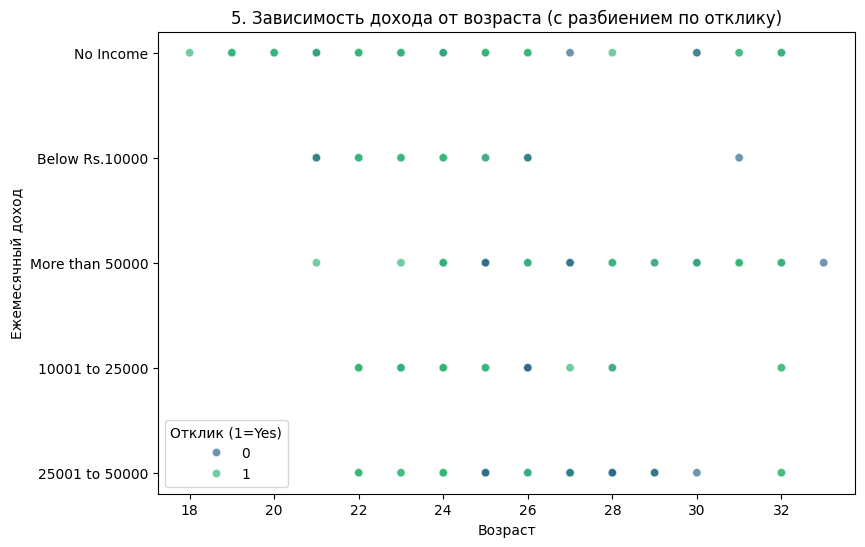

In [28]:
##Диаграмма 5 Зависимость дохода на отклик
plt.figure(figsize=(9, 6))
sns.scatterplot(x='Age', y='Monthly Income', data=df, hue='Output_encoded', palette='viridis', alpha=0.7) ##строю точечную диаграмму - точки окрашену в зависимости от откликка
plt.title(' Зависимость дохода от возраста (с разбиением по отклику)')  ## palette='viridis это цветовая схема, alpha=0.7 - это прозрачность точек
plt.xlabel('Возраст')
plt.ylabel('Ежемесячный доход')
plt.legend(title='Отклик (1=Yes)')
plt.show()

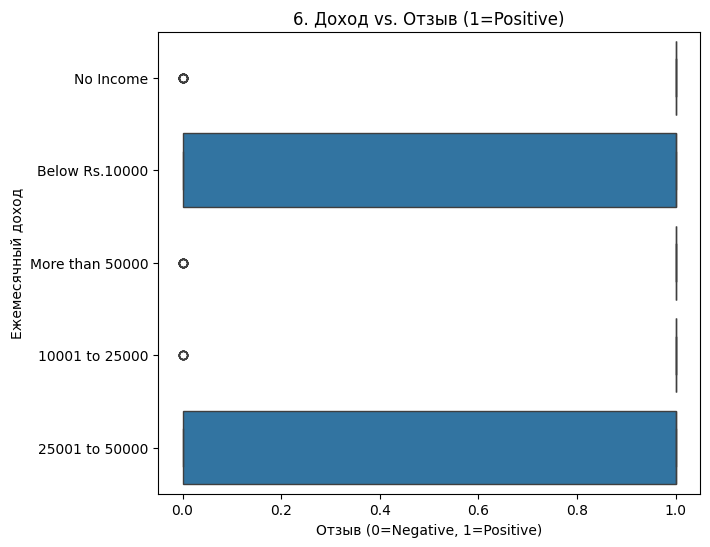

In [29]:
##Диаграмма 6 Сравниваем ежемеесечный доход с отзывами
plt.figure(figsize=(7, 6))
sns.boxplot(x='Feedback_encoded', y='Monthly Income', data=df)
plt.title('6. Доход vs. Отзыв (1=Positive)')
plt.xlabel('Отзыв (0=Negative, 1=Positive)')
plt.ylabel('Ежемесячный доход')
plt.show()

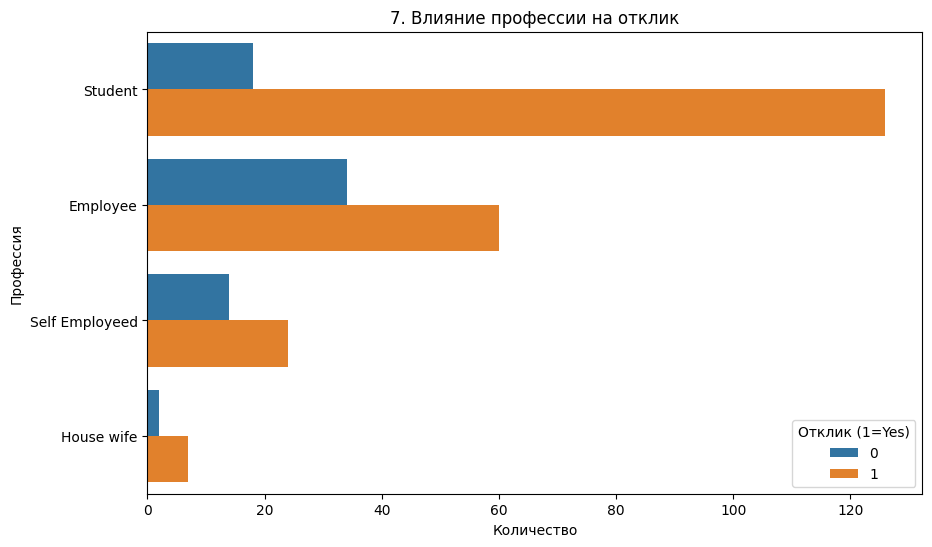

In [30]:
##Диаграмма 7 Влияние профессии на отклик
plt.figure(figsize=(10, 6))
sns.countplot(y='Occupation', hue='Output_encoded', data=df, order=df['Occupation'].value_counts().index)
plt.title('7. Влияние профессии на отклик')
plt.xlabel('Количество')
plt.ylabel('Профессия')
plt.legend(title='Отклик (1=Yes)')
plt.show()

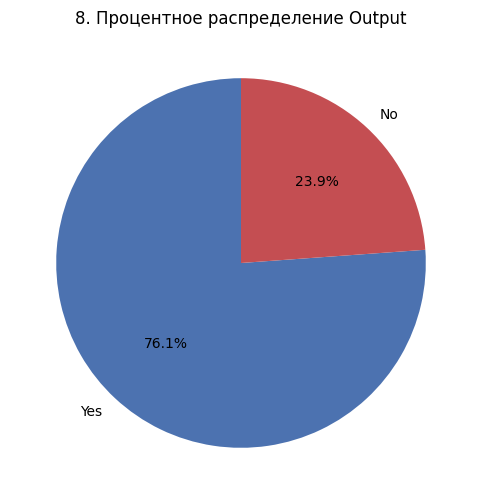

In [31]:
##Диаграмма 8 Процентное распределение по отклику
output_counts = df['Output'].value_counts()
plt.figure(figsize=(6, 6))
output_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#4c72b0', '#c44e52'])
plt.title('8. Процентное распределение Output')
plt.ylabel('')
plt.show()

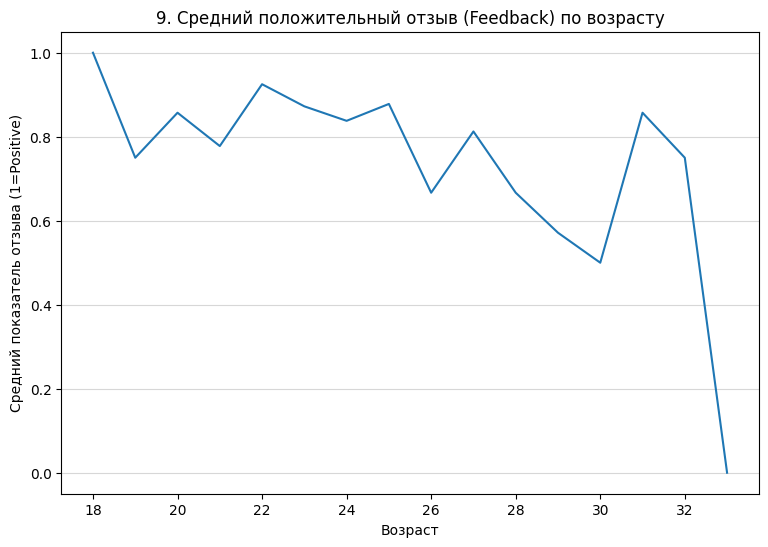

In [33]:
##Диаграмма 9 Средний положительный отзыв
plt.figure(figsize=(9, 6))
sns.lineplot(x='Age', y='Feedback_encoded', data=df, errorbar=None) ## строю линейный график который показывает среднее значение Feedback_encoded это положительные отзывы для каждого Age
plt.title('9. Средний положительный отзыв (Feedback) по возрасту') ## errorbar=None аргумент показывает только среднюю длину
plt.xlabel('Возраст')
plt.ylabel('Средний показатель отзыва (1=Positive)')
plt.grid(True, axis='y', alpha=0.5) ## добавляю горнизонталь сетку 
plt.show()

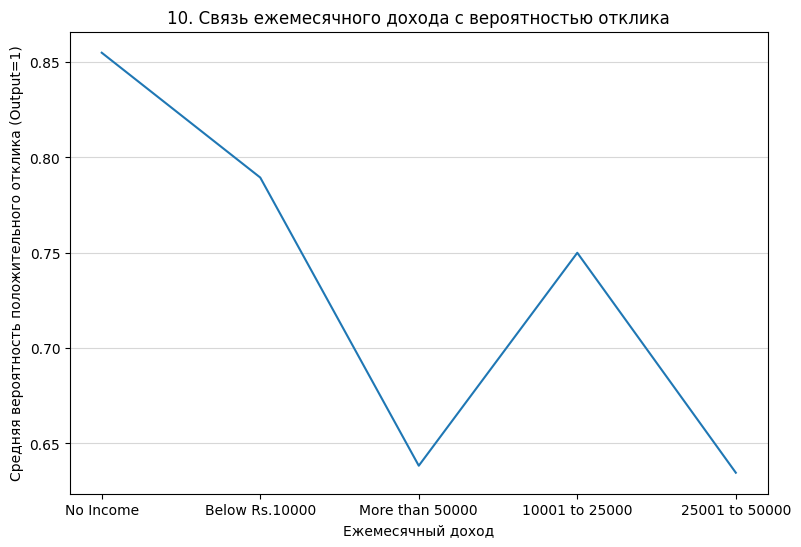

In [35]:
##Диаграмма 10 Связь ежемесечного  дохода с вероятностью дохода 
plt.figure(figsize=(9, 6))
# Строим линейный тренд между доходом и средним закодированным откликом
sns.lineplot(x='Monthly Income', y='Output_encoded', data=df, errorbar=None) ##строю линейный график где показано среднее значение отклика для каждой категории дохода
plt.title('10. Связь ежемесячного дохода с вероятностью отклика')
plt.xlabel('Ежемесячный доход')
plt.ylabel('Средняя вероятность положительного отклика (Output=1)')
plt.grid(True, axis='y', alpha=0.5)
plt.show()

In [ ]:
min_output_= df[df['Output']]